In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast

In [51]:
all_data

,AFDL,AIBL,AIBR,ALA,ASKL,ASKR,AVAL,AVAR,AVBL,AVBR,...,RMEV,SABD,SABVL,SABVR,SMBDR,SMDVL,URXL,VA1,VB1,VB2
0,-0.572754,0.507324,0.636719,0.026917,0.136719,-0.084229,0.967285,1.192383,-0.236816,-1.308594,...,-0.756836,0.049164,1.266602,1.587891,-0.322021,-0.302734,-0.779297,-0.085022,-0.619141,-0.563477
1,-0.608398,0.518555,0.595703,0.117065,0.041351,-0.003838,1.137695,1.315430,-0.269531,-1.325195,...,-0.897461,0.028854,1.453125,1.379883,-0.326904,-0.307861,-0.799316,-0.143799,-0.662598,-0.605957
2,-0.614258,0.525391,0.550293,0.213867,-0.093018,0.041595,1.247070,1.384766,-0.321289,-1.277344,...,-0.990234,0.064392,1.646484,1.173828,-0.375000,-0.269531,-0.767578,-0.155518,-0.708496,-0.653809
3,-0.606445,0.539062,0.558105,0.291748,-0.220093,0.068420,1.303711,1.405273,-0.359619,-1.205078,...,-1.017578,0.120728,1.816406,0.954590,-0.446045,-0.192627,-0.694336,-0.120911,-0.769531,-0.667969
4,-0.603027,0.567383,0.613770,0.351807,-0.324707,0.078552,1.329102,1.392578,-0.364014,-1.131836,...,-1.009766,0.184937,1.935547,0.727051,-0.528809,-0.117859,-0.598633,-0.068237,-0.831543,-0.649902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1.593211,-1.039586,-0.961250,0.906133,0.966801,1.477468,-1.092868,-1.121401,0.521904,0.215051,...,0.545601,-0.395950,-0.723998,1.827741,-0.515383,-0.547697,-0.311816,-0.598098,1.441180,-0.379652
237,1.753416,-0.953497,-0.821309,0.989698,0.905561,1.562043,-1.090944,-1.119701,0.534487,0.167998,...,0.544536,-0.392073,-0.708850,1.764988,-0.438940,-0.542725,-0.299943,-0.588558,1.381442,-0.339072
238,1.850225,-0.850002,-0.661577,1.072648,0.765675,1.538867,-1.087105,-1.116844,0.528595,0.094340,...,0.506468,-0.388346,-0.692334,1.704121,-0.341080,-0.534306,-0.290284,-0.577834,1.297005,-0.283990
239,1.880763,-0.734910,-0.492615,1.145327,0.557998,1.400889,-1.081457,-1.112296,0.507480,0.003262,...,0.437401,-0.385087,-0.675488,1.645785,-0.233504,-0.523316,-0.283736,-0.566681,1.199019,-0.213173


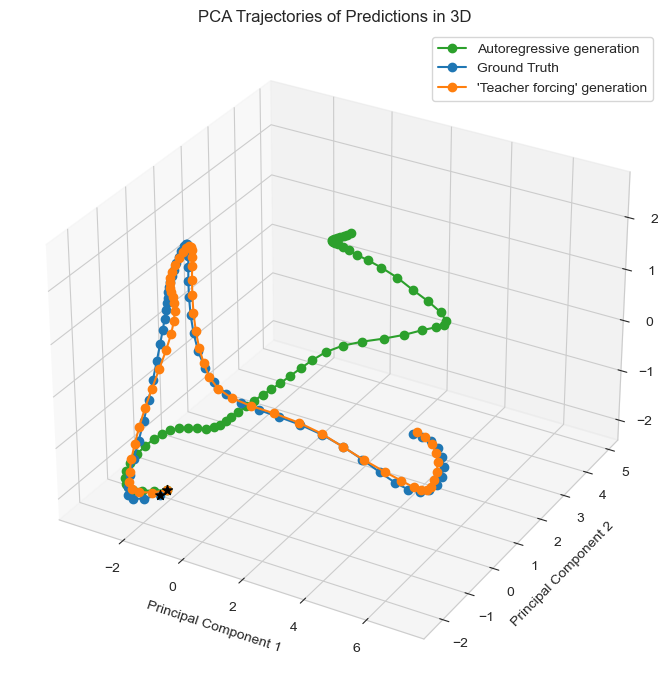

In [5]:
log_dir = '/home/lrvnc/Projects/worm-graph/logs/hydra/2023_08_15_13_40_57'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import ast
import seaborn as sns

df = pd.read_csv(os.path.join(log_dir, 'prediction', 'train', 'worm0.csv'))

# Load named neurons
ds_info = pd.read_csv(os.path.join(log_dir, 'dataset', 'dataset_info.csv'))
neurons = ds_info[ds_info['combined_dataset_index']=='worm0']['neurons']
neurons = ast.literal_eval(neurons.values[0]) # convert str to list

sns.set_style('whitegrid')
palette = sns.color_palette("tab10")
gt_color = palette[0]   # Blue
gt_generation_color = palette[1] # orange (next time step prediction with gt)
ar_generation_color = palette[2] # gree (autoregressive next time step prediction)

# Set this to '2D' or '3D' based on your requirement
plot_type = '3D'  # or '2D'

# Split data by Type
ar_gen_data = df[df['Type'] == 'AR Generation'].drop(columns=['Type', 'Unnamed: 1'])
ar_gen_data = ar_gen_data[neurons]  # Filter only named neurons

ground_truth_data = df[df['Type'] == 'Ground Truth'].drop(columns=['Type', 'Unnamed: 1'])
ground_truth_data = ground_truth_data[neurons]  # Filter only named neurons

# Extract GT Generation data
gt_gen_data = df[df['Type'] == 'GT Generation'].drop(columns=['Type', 'Unnamed: 1'])
gt_gen_data = gt_gen_data[neurons]  # Filter only named neurons

# Combine and Standardize the data
all_data = pd.concat([ar_gen_data, ground_truth_data, gt_gen_data])
#scaler = StandardScaler()
standardized_data = all_data

# Apply PCA
if plot_type == '2D':
    pca = PCA(n_components=2)
else:
    pca = PCA(n_components=3)
reduced_data = pca.fit_transform(standardized_data)

# Plot
if plot_type == '2D':
    plt.figure(figsize=(8, 7))
    
    plt.plot(reduced_data[:len(ar_gen_data), 0], reduced_data[:len(ar_gen_data), 1], color=ar_generation_color, label='Autoregressive generation', linestyle='-', marker='o')
    plt.plot(reduced_data[len(ar_gen_data):len(ar_gen_data)+len(ground_truth_data), 0], 
             reduced_data[len(ar_gen_data):len(ar_gen_data)+len(ground_truth_data), 1], color=gt_color, label='Ground Truth', linestyle='-', marker='o')
    plt.plot(reduced_data[len(ar_gen_data)+len(ground_truth_data):, 0], 
             reduced_data[len(ar_gen_data)+len(ground_truth_data):, 1], color=gt_generation_color, label="'Teacher forcing' generation", linestyle='-', marker='o')
    
    # Mark starting points with black stars
    plt.scatter(reduced_data[0, 0], reduced_data[0, 1], color='black', marker='*', s=50)
    plt.scatter(reduced_data[len(ar_gen_data), 0], reduced_data[len(ar_gen_data), 1], color='black', marker='*', s=50)
    plt.scatter(reduced_data[len(ar_gen_data)+len(ground_truth_data), 0], reduced_data[len(ar_gen_data)+len(ground_truth_data), 1], color='black', marker='*', s=50)
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

else:
    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(reduced_data[:len(ar_gen_data), 0], reduced_data[:len(ar_gen_data), 1], reduced_data[:len(ar_gen_data), 2], color=ar_generation_color, label='Autoregressive generation', linestyle='-', marker='o')
    ax.plot(reduced_data[len(ar_gen_data):len(ar_gen_data)+len(ground_truth_data), 0], 
            reduced_data[len(ar_gen_data):len(ar_gen_data)+len(ground_truth_data), 1],
            reduced_data[len(ar_gen_data):len(ar_gen_data)+len(ground_truth_data), 2], color=gt_color, label='Ground Truth', linestyle='-', marker='o')
    ax.plot(reduced_data[len(ar_gen_data)+len(ground_truth_data):, 0], 
            reduced_data[len(ar_gen_data)+len(ground_truth_data):, 1],
            reduced_data[len(ar_gen_data)+len(ground_truth_data):, 2], color=gt_generation_color, label="'Teacher forcing' generation", linestyle='-', marker='o')
    
    # Mark starting points with black stars
    ax.scatter(reduced_data[0, 0], reduced_data[0, 1], reduced_data[0, 2], color='black', marker='*', s=50)
    ax.scatter(reduced_data[len(ar_gen_data), 0], reduced_data[len(ar_gen_data), 1], reduced_data[len(ar_gen_data), 2], color='black', marker='*', s=50)
    ax.scatter(reduced_data[len(ar_gen_data)+len(ground_truth_data), 0], reduced_data[len(ar_gen_data)+len(ground_truth_data), 1], reduced_data[len(ar_gen_data)+len(ground_truth_data), 2], color='black', marker='*', s=50)
    
    
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

plt.legend()
plt.title(f'PCA Trajectories of Predictions in {plot_type}')
plt.tight_layout()
plt.show()